In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [3]:
data = pd.read_csv("/kaggle/input/noshowappointments/KaggleV2-May-2016.csv")

In [4]:
data.head()
data = data.drop(['PatientId', 'AppointmentID'], axis=1)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [6]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
Gender = data[["Gender"]]
Gender_encoded = ordinal_encoder.fit_transform(Gender)
data["Gender"]=Gender_encoded 
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0.0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,1.0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,0.0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,0.0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,0.0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
Noshow = data[["No-show"]]
No_show_encoded = ordinal_encoder.fit_transform(Noshow)
data["No-show"] = No_show_encoded
data.head(6)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0.0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0.0
1,1.0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0.0
2,0.0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0.0
3,0.0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0.0
4,0.0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0.0
5,0.0,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,0.0


In [8]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['days_between'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days +1
data = data.drop(['ScheduledDay', 'AppointmentDay'], axis=1)


In [9]:
cols = data.columns.tolist()
cols.insert(1, cols.pop(cols.index('days_between')))
data = data[cols]

In [10]:
data.head()

,Gender,days_between,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0.0,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0.0
1,1.0,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0.0
2,0.0,0,62,MATA DA PRAIA,0,0,0,0,0,0,0.0
3,0.0,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0.0
4,0.0,0,56,JARDIM DA PENHA,0,1,1,0,0,0,0.0


In [11]:
data['Neighbourhood'].value_counts()

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Neighbourhood_encoded'] = le.fit_transform(data['Neighbourhood'])
data['Neighbourhood']= data['Neighbourhood_encoded']
data = data.drop(['Neighbourhood_encoded'], axis=1)
data.head()


,Gender,days_between,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0.0,0,62,39,0,1,0,0,0,0,0.0
1,1.0,0,56,39,0,0,0,0,0,0,0.0
2,0.0,0,62,45,0,0,0,0,0,0,0.0
3,0.0,0,8,54,0,0,0,0,0,0,0.0
4,0.0,0,56,39,0,1,1,0,0,0,0.0


In [190]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
data['Age_scaled']  = scaler.fit_transform(data['Age'].values.reshape(-1,1))
data['Age'] = data['Age_scaled'] 
data = data.drop(['Age_scaled'], axis=1)
data.head(5)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [14]:
data.isnull().sum()

Gender           0
days_between     0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
No-show          0
dtype: int64

In [15]:
data.corr()

,Gender,days_between,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Gender,1.000000,-0.028406,-0.106440,-0.008058,-0.114293,-0.055718,-0.032554,0.106167,0.022814,-0.046298,-0.004119
days_between,-0.028406,1.000000,0.034820,-0.002057,-0.030421,-0.017215,-0.027188,-0.038519,-0.019843,0.398145,0.186231
Age,-0.106440,0.034820,1.000000,-0.016358,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,-0.060319
Neighbourhood,-0.008058,-0.002057,-0.016358,1.000000,0.006866,0.004323,0.011347,-0.000010,0.010990,0.018269,-0.008962
Scholarship,-0.114293,-0.030421,-0.092457,0.006866,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135
Hipertension,-0.055718,-0.017215,0.504586,0.004323,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701
Diabetes,-0.032554,-0.027188,0.292391,0.011347,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180
Alcoholism,0.106167,-0.038519,0.095811,-0.000010,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196
Handcap,0.022814,-0.019843,0.078033,0.010990,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076
SMS_received,-0.046298,0.398145,0.012643,0.018269,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431


In [16]:
data =  np.array(data)
m,n = data.shape
np.random.shuffle(data)
data.shape


(110527, 11)

In [17]:
data_dev = data[0:10000].T
Y_dev = data_dev[n-1]
X_dev = data_dev[0:n-1]

data_train = data[10000:m].T
Y_train = data_train[n-1]
X_train = data_train[0:n-1]

In [18]:
X_train[:,0].shape

(10,)

In [19]:
import torch
import torch.nn as nn


In [189]:
model = nn.Sequential(
    nn.Linear(in_features = 10, out_features = 64),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=1),
    nn.Sigmoid() 
)

In [100]:
X = torch.tensor(X_train, dtype = torch.float32)
Y = torch.tensor(Y_train.reshape(-1,1), dtype = torch.float32)
X=X.T

In [22]:
X

tensor([[ 0.0000,  6.0000,  0.8103,  ...,  0.0000,  0.0000,  0.0000],
        [ 1.0000,  0.0000,  0.3534,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000, 13.0000,  0.7328,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  5.0000,  0.3362,  ...,  0.0000,  0.0000,  1.0000],
        [ 1.0000,  7.0000,  0.6724,  ...,  0.0000,  0.0000,  1.0000],
        [ 1.0000,  0.0000,  0.2069,  ...,  0.0000,  0.0000,  0.0000]])

In [101]:
class_weights = torch.tensor([0.25], dtype=torch.float32)
loss_function = nn.BCEWithLogitsLoss(pos_weight=class_weights)


In [123]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(),lr =0.01)

In [103]:
X = (X-X.mean())/X.std()

In [104]:

X.shape

torch.Size([100527, 10])

In [105]:
Y.shape

torch.Size([100527, 1])

In [124]:
losses = []
for epoch in range(4000):
    yhat = model(X)
    loss = loss_function(yhat,Y)
    optimizer.zero_grad()
    loss.backward()
    losses.append(loss.item())
    optimizer.step()


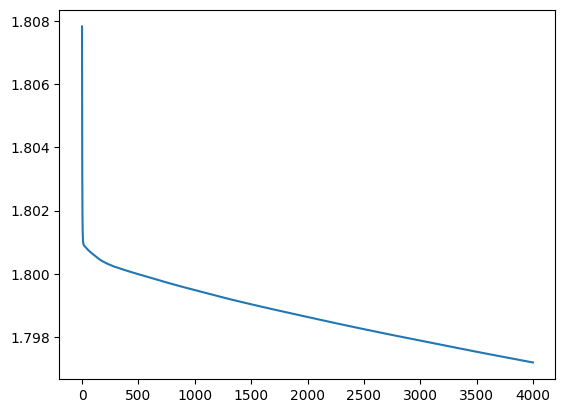

In [125]:
plt.plot(losses)

In [108]:
model(X)[:100]

tensor([[0.2046],
        [0.0965],
        [0.3173],
        [0.3389],
        [0.1560],
        [0.3230],
        [0.1141],
        [0.3449],
        [0.1630],
        [0.1841],
        [0.1083],
        [0.3394],
        [0.0979],
        [0.0979],
        [0.0985],
        [0.1157],
        [0.0975],
        [0.0997],
        [0.1128],
        [0.2083],
        [0.0978],
        [0.3394],
        [0.1015],
        [0.1442],
        [0.3450],
        [0.3402],
        [0.1651],
        [0.3369],
        [0.2915],
        [0.2217],
        [0.2177],
        [0.0968],
        [0.1048],
        [0.0981],
        [0.1025],
        [0.3450],
        [0.0984],
        [0.3417],
        [0.1136],
        [0.2340],
        [0.3257],
        [0.0984],
        [0.2010],
        [0.2942],
        [0.1099],
        [0.1137],
        [0.1782],
        [0.3255],
        [0.0976],
        [0.2487],
        [0.3397],
        [0.1141],
        [0.3476],
        [0.0996],
        [0.2924],
        [0

In [110]:
predictions = torch.where(model(X)>0.3,1,0)

In [111]:
predictions[:10]

tensor([[0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0]])

In [112]:
Y[:10]

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.]])

In [113]:
def compute_accuracy(model, X, Y):
    model.eval()  
    with torch.no_grad():
        y_pred = model(X)
        predicted = (y_pred >= 0.33).float() 
        correct = (predicted == Y).float().sum()
        accuracy = correct / Y.shape[0]
    return accuracy.item()

In [114]:
test_x = torch.tensor(X_dev, dtype = torch.float32)
test_y = torch.tensor(Y_dev.reshape(-1,1), dtype = torch.float32)
test_x = test_x.T

In [115]:
compute_accuracy(model,test_x,test_y)

0.7925999760627747

In [86]:
test_y[:10]

tensor([[1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.]])

In [87]:
predicted = torch.where(model(test_x)>0.3,1,0)
predicted[:10]

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0]])

In [88]:
from sklearn.metrics import f1_score

In [118]:
f1_score(predicted,test_y,average = 'weighted')

0.8350817216448917

In [90]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(test_y, predicted)

In [116]:
pr_auc = auc(recall, precision)
pr_auc

0.2806049330514447

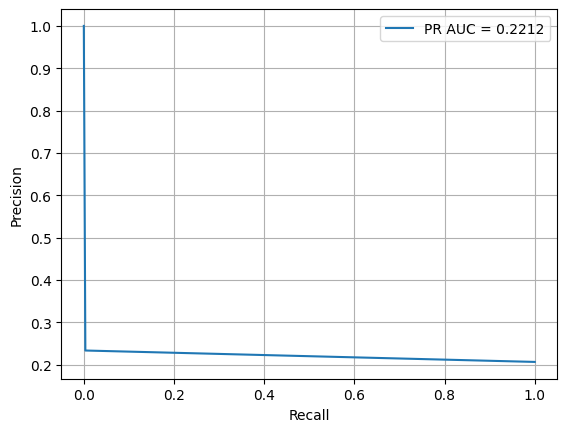

In [43]:
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_y, predicted)


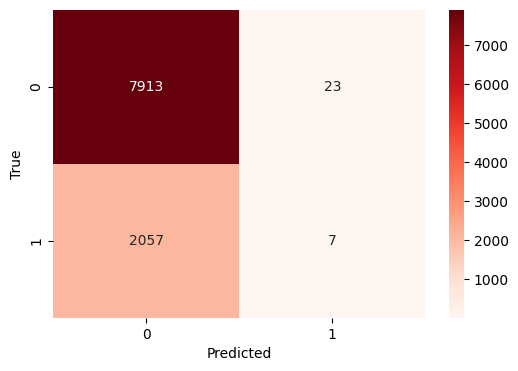

In [117]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()